# Clasificacion Basica: Predecir una imagen de moda

Esta Guia entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas.

Esta Guia usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [69]:
fashion_mnist = keras.datasets.fashion_mnist

In [70]:
fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [71]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [72]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


La *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset. Los guardamos en la siguiente lista:

In [73]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [74]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore el set de datos

* ¿Cuántas imagenes hay en train?
* ¿Y en test?
* ¿De cuántos pixels se compone cada imagen?
* ¿Cuáles son los valores de los labels?

In [75]:
X_train.shape

(60000, 28, 28)

In [76]:
X_test.shape

(10000, 28, 28)

In [78]:
X_test[0].size

784

In [80]:
set(y_test)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

## Pre-procese el set de datos

Inspecciona y representa la primera imagen del dataset de train. Para ello, utiliza la función `imshow` de matplotlib.

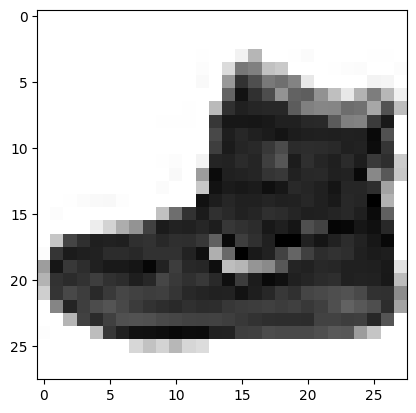

In [84]:
plt.imshow(X_train[0], cmap= 'binary');

Escala los conjuntos de train y test para que vayan del 0 al 1. No hace falta usar ninguna librería. Con realizar una división en cada conjunto será suficiente.

In [85]:
X_train.max()

255

In [87]:
X_train.min()

0

In [88]:
X_train_scal = X_train/255
X_test_scal = X_test/255

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

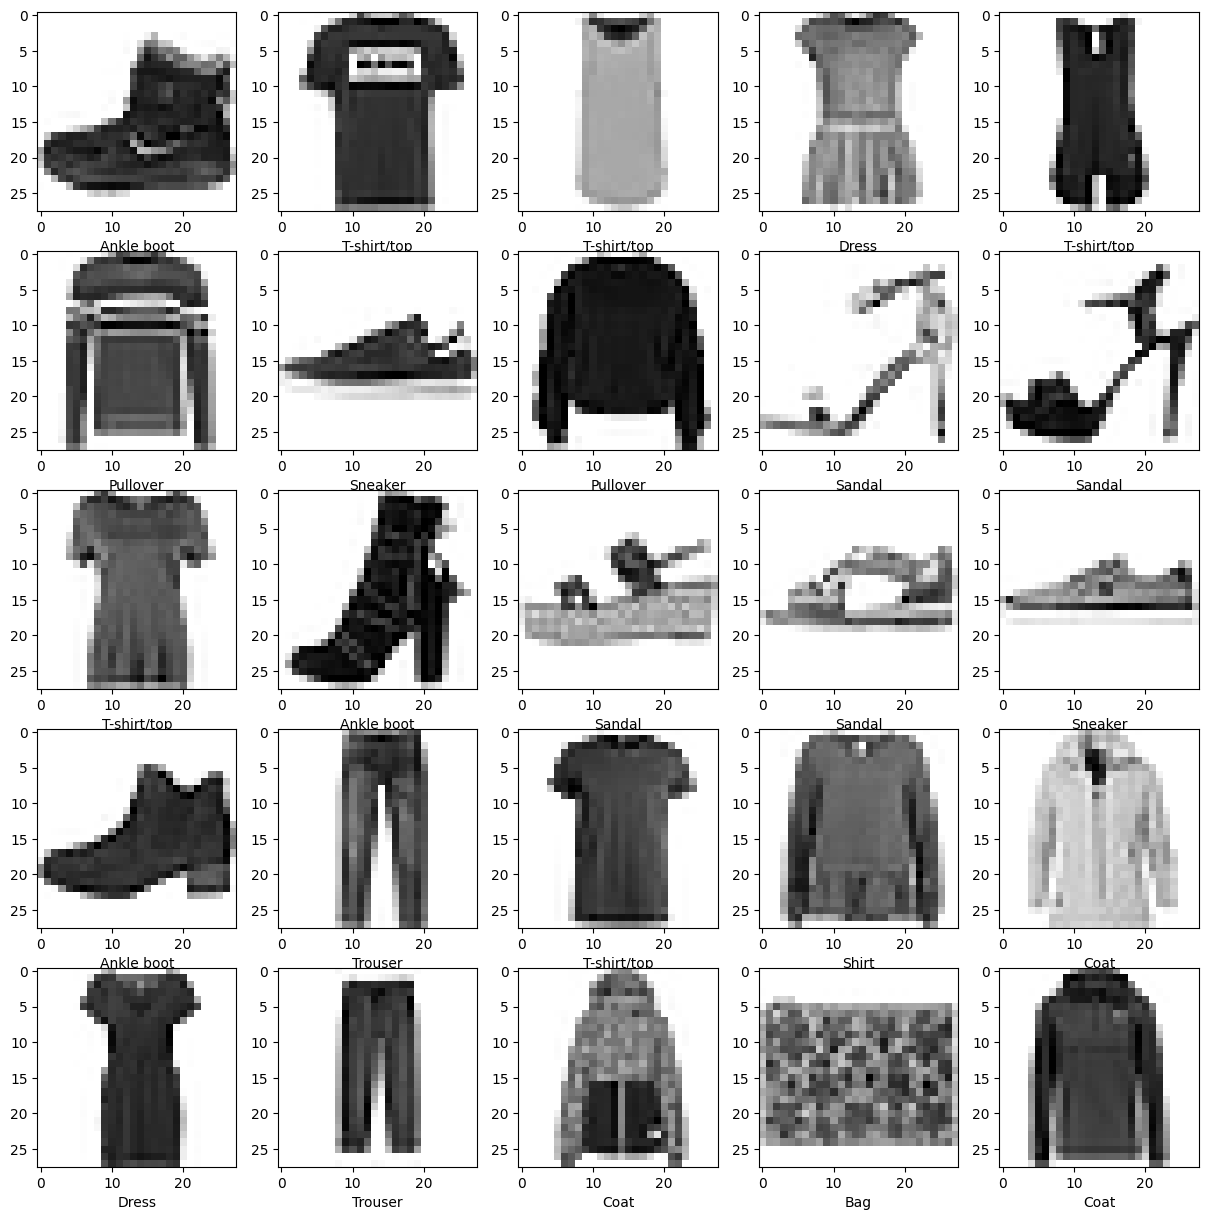

In [89]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.imshow(X_train[i], cmap='binary')
    plt.xlabel(class_names[y_train[i]])

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas
Construye todas las capas del modelo.

In [92]:
X_train[0].shape

(28, 28)

In [93]:
capas = [keras.layers.Flatten(input_shape = (X_train[0].shape)),
         keras.layers.Dense(300, 'relu'),
         keras.layers.Dense(100, 'relu'),
         keras.layers.Dense(10, 'softmax')]

model = keras.models.Sequential(capas)

### Compila el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.
* *Optimizer* — Esto es cómo el modelo aprende basado en el set de datos que ve y la función de pérdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.


Como es un problema de clasificación multiclase, tendrás que usar `sparse_categorical_crossentropy` como función de coste. En cuanto a las métricas, usa simplemente `accuracy`.

In [94]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer= 'sgd',
              metrics = ['accuracy'])

## Entrenar el Modelo
Empieza entrenándolo con 10 epochs. Prueba con más

In [95]:
history = model.fit(X_train_scal, 
                    y_train,
                    batch_size= 128,
                    epochs= 10,
                    validation_split= 0.20)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 1.1138 - accuracy: 0.6582 - val_loss: 0.7386 - val_accuracy: 0.7650
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.6632 - accuracy: 0.7863 - val_loss: 0.6066 - val_accuracy: 0.7988
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.5681 - accuracy: 0.8140 - val_loss: 0.5374 - val_accuracy: 0.8207
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.5230 - accuracy: 0.8254 - val_loss: 0.5062 - val_accuracy: 0.8276
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.4946 - accuracy: 0.8324 - val_loss: 0.4927 - val_accuracy: 0.8271
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.4753 - accuracy: 0.8376 - val_loss: 0.4839 - val_accuracy: 0.8313
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.4601 - accuracy: 0.8420 - val_loss: 0.4595 - val_accuracy: 0.8412
Epoch 

## Evaluar Accuracy
Prueba el rendimiento del modelo con los datos de test

In [96]:
model.evaluate(X_test_scal, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4607 - accuracy: 0.8401


[0.4607176184654236, 0.8400999903678894]

## Hacer predicciones

Con el modelo entrenado puedes usarlo para hacer predicciones sobre imagenes.

In [99]:
X_test_scal[0].shape

(28, 28)

In [102]:
X_test_scal[0:1].shape

(1, 28, 28)

In [104]:
y_test[0]

9

In [103]:
model.predict(X_test_scal[0:1]).argmax()

1/1 [==============================] - 0s 29ms/step


9

El modelo ha predicho la etiqueta para cada imagen en el set de datos de *test* (prueba). Miremos la primera prediccion:

In [110]:
predictions = model.predict(X_test_scal)

313/313 [==============================] - 1s 2ms/step


In [109]:
# predictions = predictions.argmax(axis= 1)

*una* prediccion es un array de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Puedes revisar cual tiene el nivel mas alto de confianza:

In [112]:
predictions[0].argmax()

array([1.3680993e-05, 8.4141429e-06, 2.7181164e-05, 8.4074978e-05,
       2.1488564e-05, 9.2720225e-02, 7.7469675e-05, 2.0452523e-01,
       5.3054080e-03, 6.9721687e-01], dtype=float32)

Entonces, el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificación es correcta:

In [113]:
class_names[predictions[0].argmax()]

'Ankle boot'

**Grafica** esto para poder ver todo el set de la prediccion de las 10 clases.

In [114]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [116]:
y_test_predict = model.predict(X_test_scal)

313/313 [==============================] - 1s 2ms/step


Miremos la imagen [0], sus predicciones y el array de predicciones. Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje (sobre 100) para la etiqueta predecida.

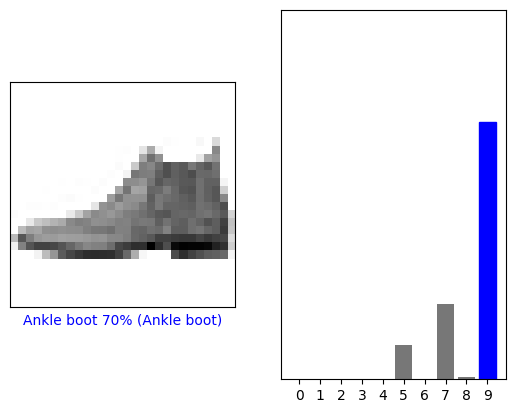

In [117]:
plt.subplot(1, 2, 1)
plot_image(0, y_test_predict[0], y_test, X_test)

plt.subplot(1, 2, 2)
plot_value_array(0, y_test_predict[0], y_test)

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

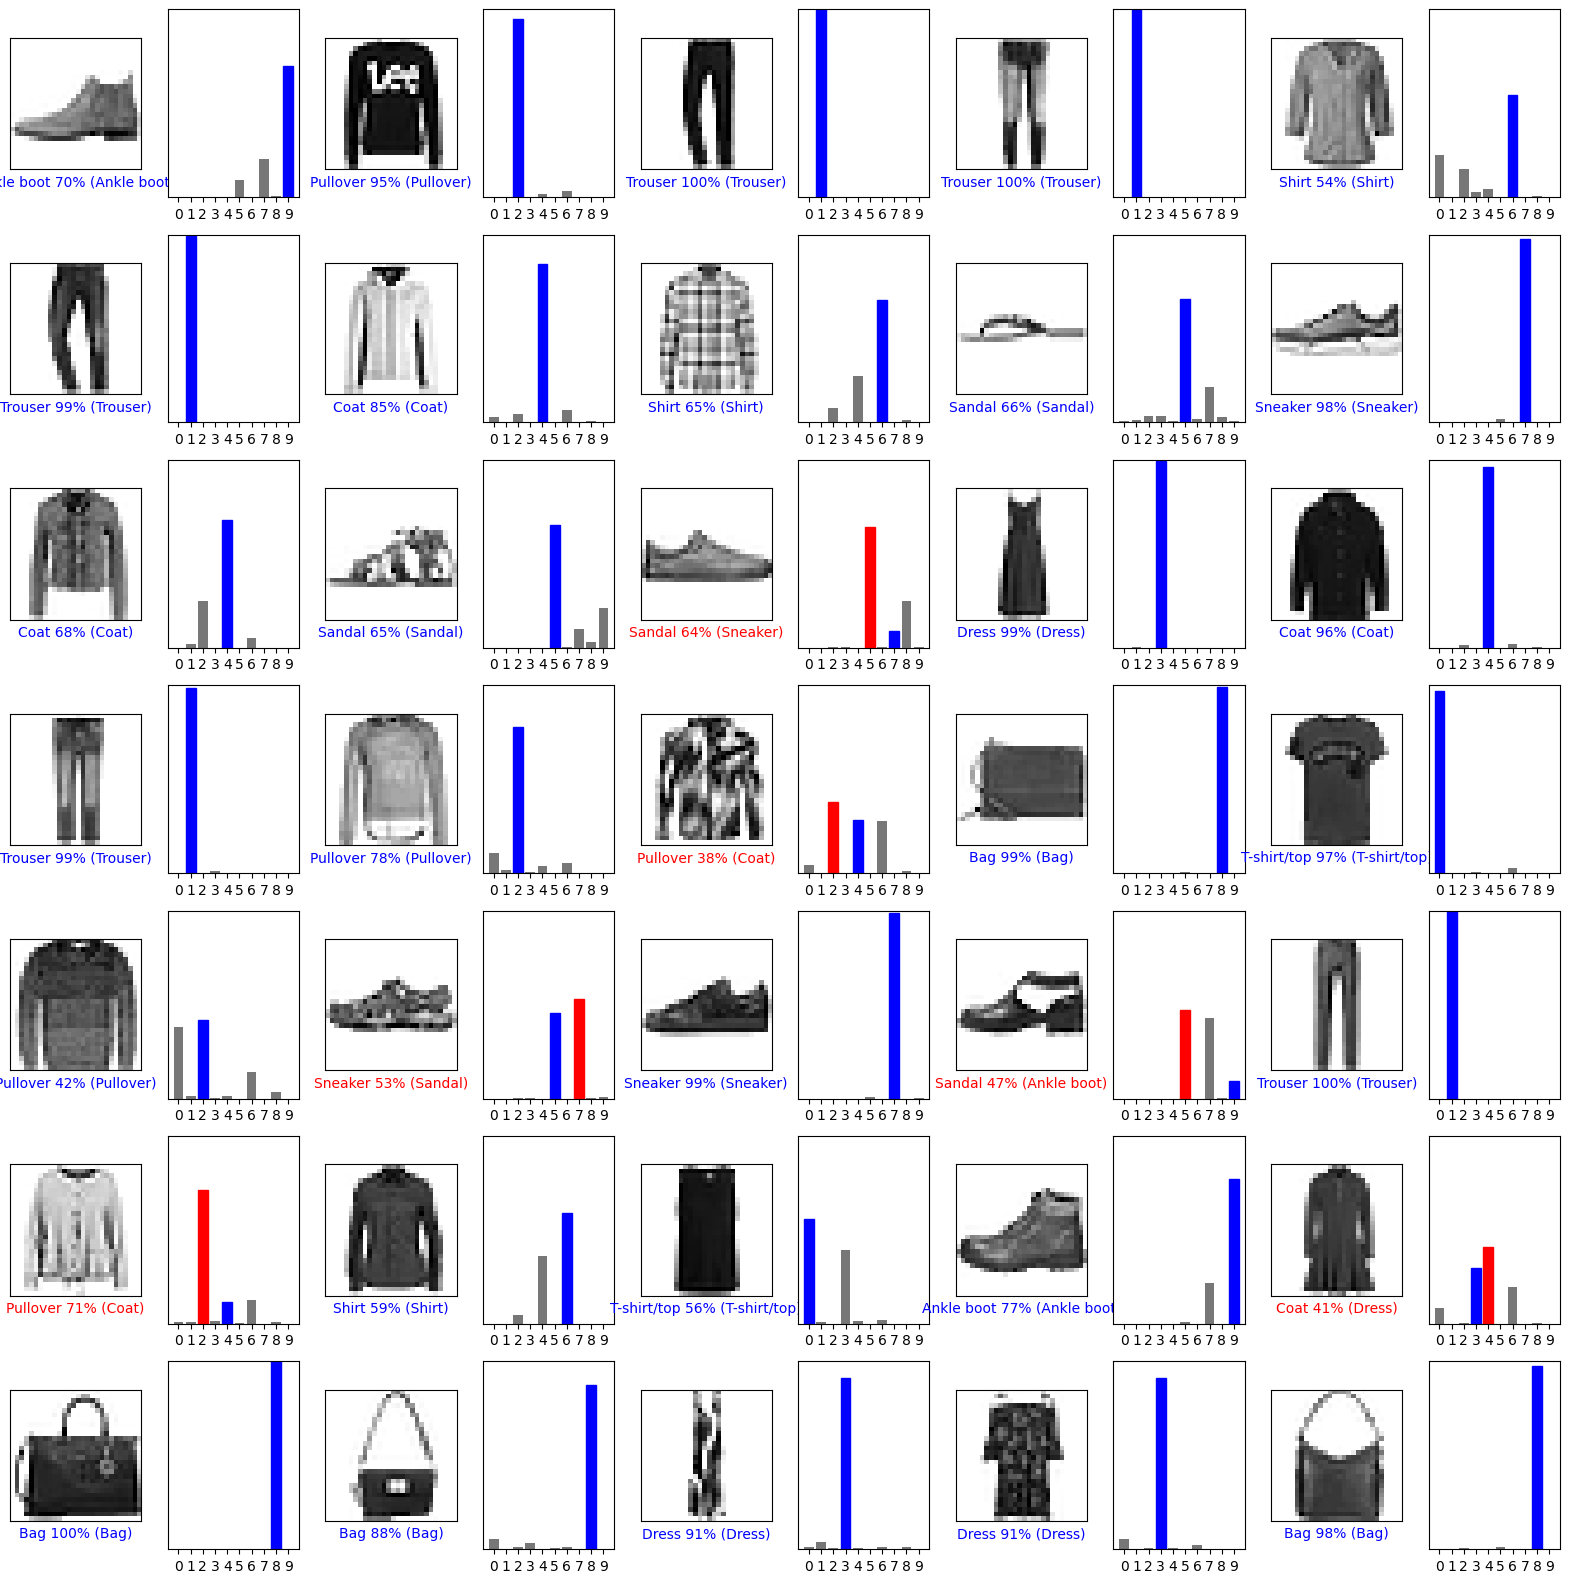

In [118]:
n_rows = 7
n_cols = 5
n_im = n_rows * n_cols
plt.figure(figsize=(20,20))

for i in range(n_im):
    plt.subplot(n_rows, n_cols*2 , 2*i + 1)
    plot_image(i, y_test_predict[i], y_test, X_test)
    plt.subplot(n_rows, n_cols*2, 2*i + 2)
    plot_value_array(i, y_test_predict[i], y_test)

plt.show()

Evalúa tu modelo con una matriz de confusión e interprétala.

In [119]:
from sklearn.metrics import confusion_matrix

In [123]:
y_test_predict.argmax(axis= 1)

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [129]:
confusion_matrix(y_test, y_test_predict.argmax(axis= 1))

array([[843,   2,  13,  55,   5,   3,  62,   0,  17,   0],
       [  2, 950,   7,  31,   6,   0,   2,   0,   2,   0],
       [ 21,   6, 719,  13, 177,   1,  49,   0,  14,   0],
       [ 35,  10,   9, 873,  38,   1,  30,   0,   4,   0],
       [  0,   3,  76,  40, 825,   0,  49,   0,   7,   0],
       [  0,   0,   0,   1,   0, 922,   0,  52,   2,  23],
       [180,   3, 120,  49, 149,   1, 463,   0,  35,   0],
       [  0,   0,   0,   0,   0,  35,   0, 910,   0,  55],
       [  4,   1,  13,   7,   2,   6,   8,   5, 954,   0],
       [  0,   0,   0,   1,   0,  15,   0,  41,   1, 942]], dtype=int64)

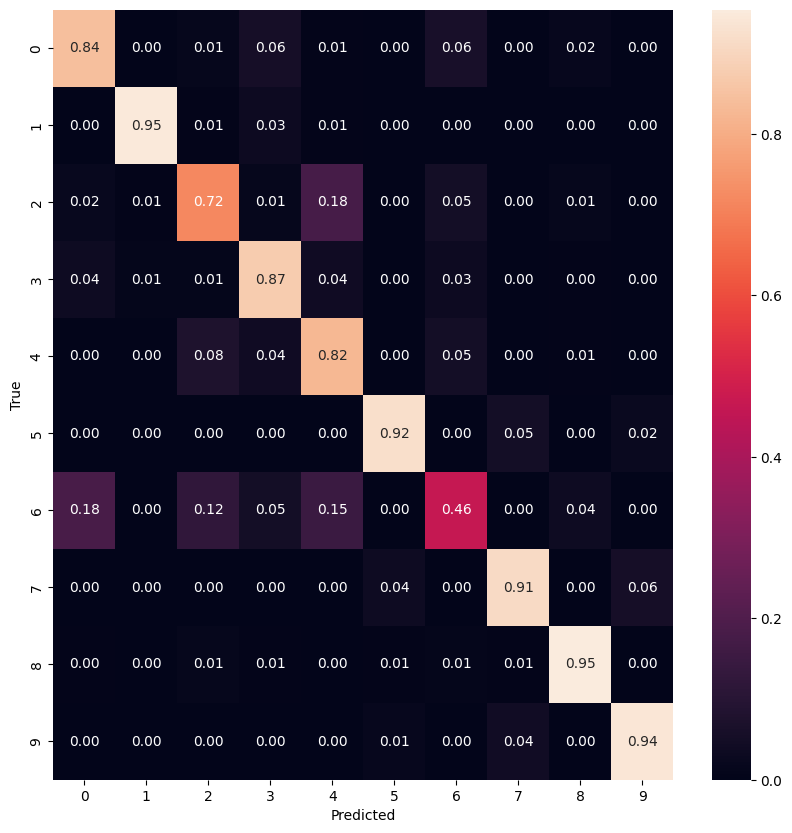

In [140]:
plt.figure(figsize= (10, 10))
sns.heatmap(confusion_matrix(y_test, y_test_predict.argmax(axis= 1), normalize= 'true'), annot= True, fmt = '.2f')
plt.xlabel('Predicted')
plt.ylabel('True');

In [142]:
class_names[0]

'T-shirt/top'

In [145]:
class_names[3]

'Dress'

In [144]:
class_names[4]

'Coat'

In [143]:
class_names[6]

'Shirt'

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.

In [148]:
model.predict(X_test_scal[0:1]).argmax()

1/1 [==============================] - 0s 46ms/step


9